In [12]:
import tensorflow as tf 

In [13]:
import keras 

Using TensorFlow backend.


In [21]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [22]:
dataset = pd.read_csv('ratings.csv')
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())

In [23]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [24]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [25]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
model.save('regression_model.h5')

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
785404/785404 [==============================] - 339s 431us/step - loss: 14.0002
Epoch 2/10
785404/785404 [==============================] - 330s 421us/step - loss: 5.1258
Epoch 3/10
785404/785404 [==============================] - 378s 481us/step - loss: 1.9129
Epoch 4/10
785404/785404 [==============================] - 390s 496us/step - loss: 1.2163
Epoch 5/10
785404/785404 [==============================] - 348s 443us/step - loss: 0.9579
Epoch 6/10
785404/785404 [==============================] - 342s 436us/step - loss: 0.8310
Epoch 7/10
785404/785404 [==============================] - 333s 424us/step - loss: 0.7585
Epoch 8/10
785404/785404 [==============================] - 337s 429us/step - loss: 0.7148
Epoch 9/10
785404/785404 [==============================] - 334s 425us/step - loss: 0.6864
Epoch 10/10
785404/785404 [==============================] - 341s 434us/step - loss: 0.6671


In [26]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

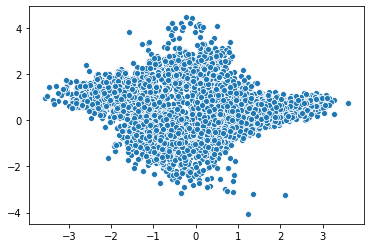

In [29]:
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.008s...
[t-SNE] Computed neighbors for 10001 samples in 0.653s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.182131
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.831078
[t-SNE] KL

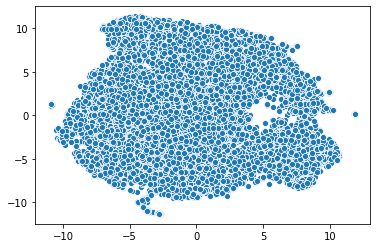

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

In [42]:
# Creating dataset for making recommendations for the first user
import numpy as np
book_data = np.array(list(set(dataset.book_id)))
user = np.array([1 for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
print(recommended_book_ids)
print(predictions[recommended_book_ids])

[8232 4942 9346 9841 7660]
[4.9824505 4.97112   4.927016  4.8940773 4.804774 ]


In [36]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [43]:
print(books[books['id'].isin(recommended_book_ids)].original_title)


4941                                           Wise Blood
7659                   Fables, Volume 5: The Mean Seasons
8231    How Soccer Explains the World: An Unlikely The...
9345                                 Call Me Irresistible
9840                                      Blackberry Wine
Name: original_title, dtype: object


In [48]:
predictions[0]

1.6521308

In [52]:
# Creating dataset for making recommendations for the first user
import numpy as np
uID = int(input("Enter the user id to whom you want to recommend : "))
book_data = np.array(list(set(dataset.book_id)))
user = np.array([uID for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:10]
print(books[books['id'].isin(recommended_book_ids)].original_title)


Enter the user id to whom you want to recommend : 6
4184                                    Fallen Crest High
4941                                           Wise Blood
6882                                The House at Tyneford
7240                                           Full House
7493                                                  NaN
7659                   Fables, Volume 5: The Mean Seasons
7945    The Beauty Myth: How Images of Beauty Are Used...
8231    How Soccer Explains the World: An Unlikely The...
9345                                 Call Me Irresistible
9840                                      Blackberry Wine
Name: original_title, dtype: object
